# Heart Disease Prediction - Avengers : Case Study 2

**Data Processing for case study 2**

**Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Attribute Information:

- age
- sex (1=male,0=female)
- chest pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target:0 for no presence of heart disease, 1 for presence of heart disease

# Exploratory Data Analysis

In [4]:
#Total number of rows and columns of the dataframe
df.shape

(303, 14)

In [5]:
# Check the data type and if missing value exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Comparing the number of unique data from the data description if there are outliers exist
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

**'thal' should have 3 unique data while 'ca' should have 4 unique data**

In [7]:
# A simple statistic description of the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


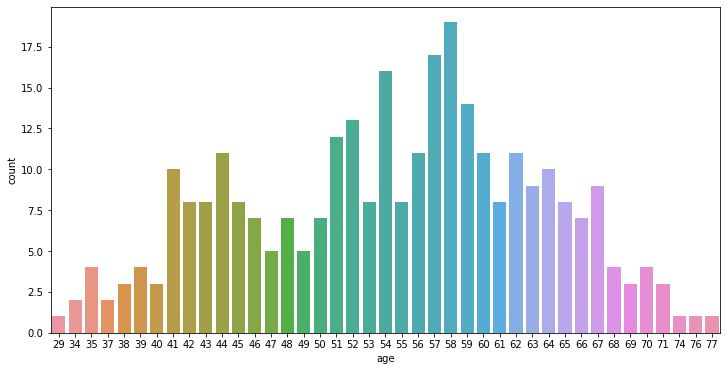

In [8]:
# Find the minumum, maximum and average age of the patients
plt.figure(figsize=(12,6))
sns.countplot(x='age',data=df);

min age = 25

max age = 77 

mean age = 54

In [9]:
colors = ['#66b3ff','#ff9999']

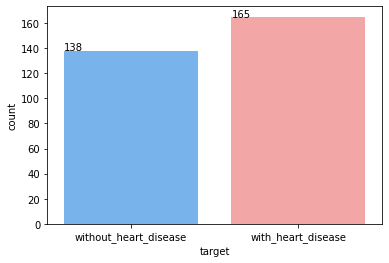

In [10]:
ax=sns.countplot(x='target',data=df,palette=colors)
ax.set_xticklabels(['without_heart_disease',"with_heart_disease"]);

for p in ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt);
    
# the dataset had more patient with heart disease

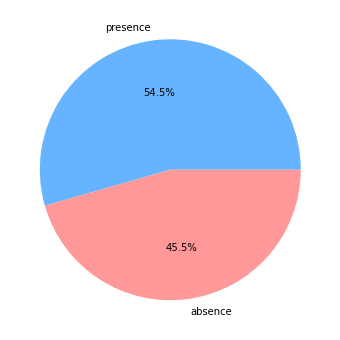

In [11]:
presence =[165,138]
labels = ["presence",'absence']

plt.figure(figsize=(12,6))
plt.axis=['equal']
plt.pie(presence,labels=labels,radius=1.0,autopct='%0.1f%%',colors=colors);

https://www.kaggle.com/chingchunyeh/heart-disease-report

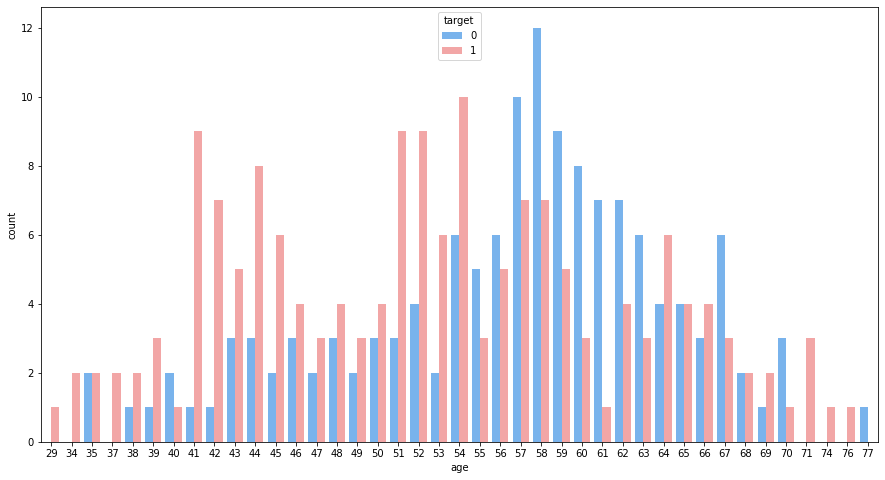

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(x='age',data=df,hue='target',palette=colors);

# more patient with heart disease for patient age range of 40-54
# more patient without heart disease for patient age range 55-70

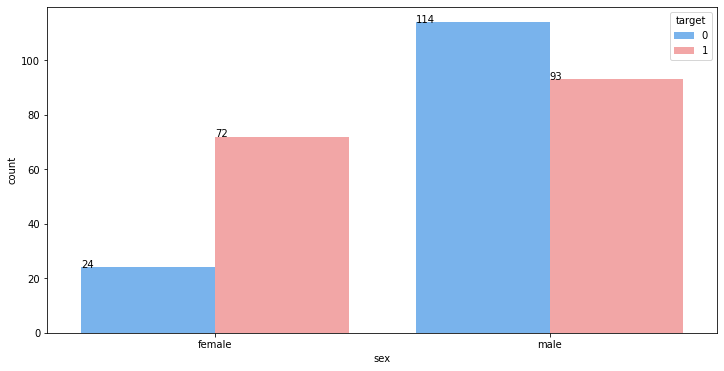

In [13]:
plt.figure(figsize=(12,6))
ax=sns.countplot(x='sex',data=df,hue='target',palette=colors);
ax.set_xticklabels(['female',"male"])

for p in ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt);

# 1=male,0=female
# the dataset had more male patients
# female had more patients with heart disease
# male had more patients without heart disease

In [14]:
df.corr()['target'].sort_values()

exang      -0.436757
oldpeak    -0.430696
ca         -0.391724
thal       -0.344029
sex        -0.280937
age        -0.225439
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
slope       0.345877
thalach     0.421741
cp          0.433798
target      1.000000
Name: target, dtype: float64

In [15]:
df_simp=df[['age','restecg','thalach','cp','slope','target']]

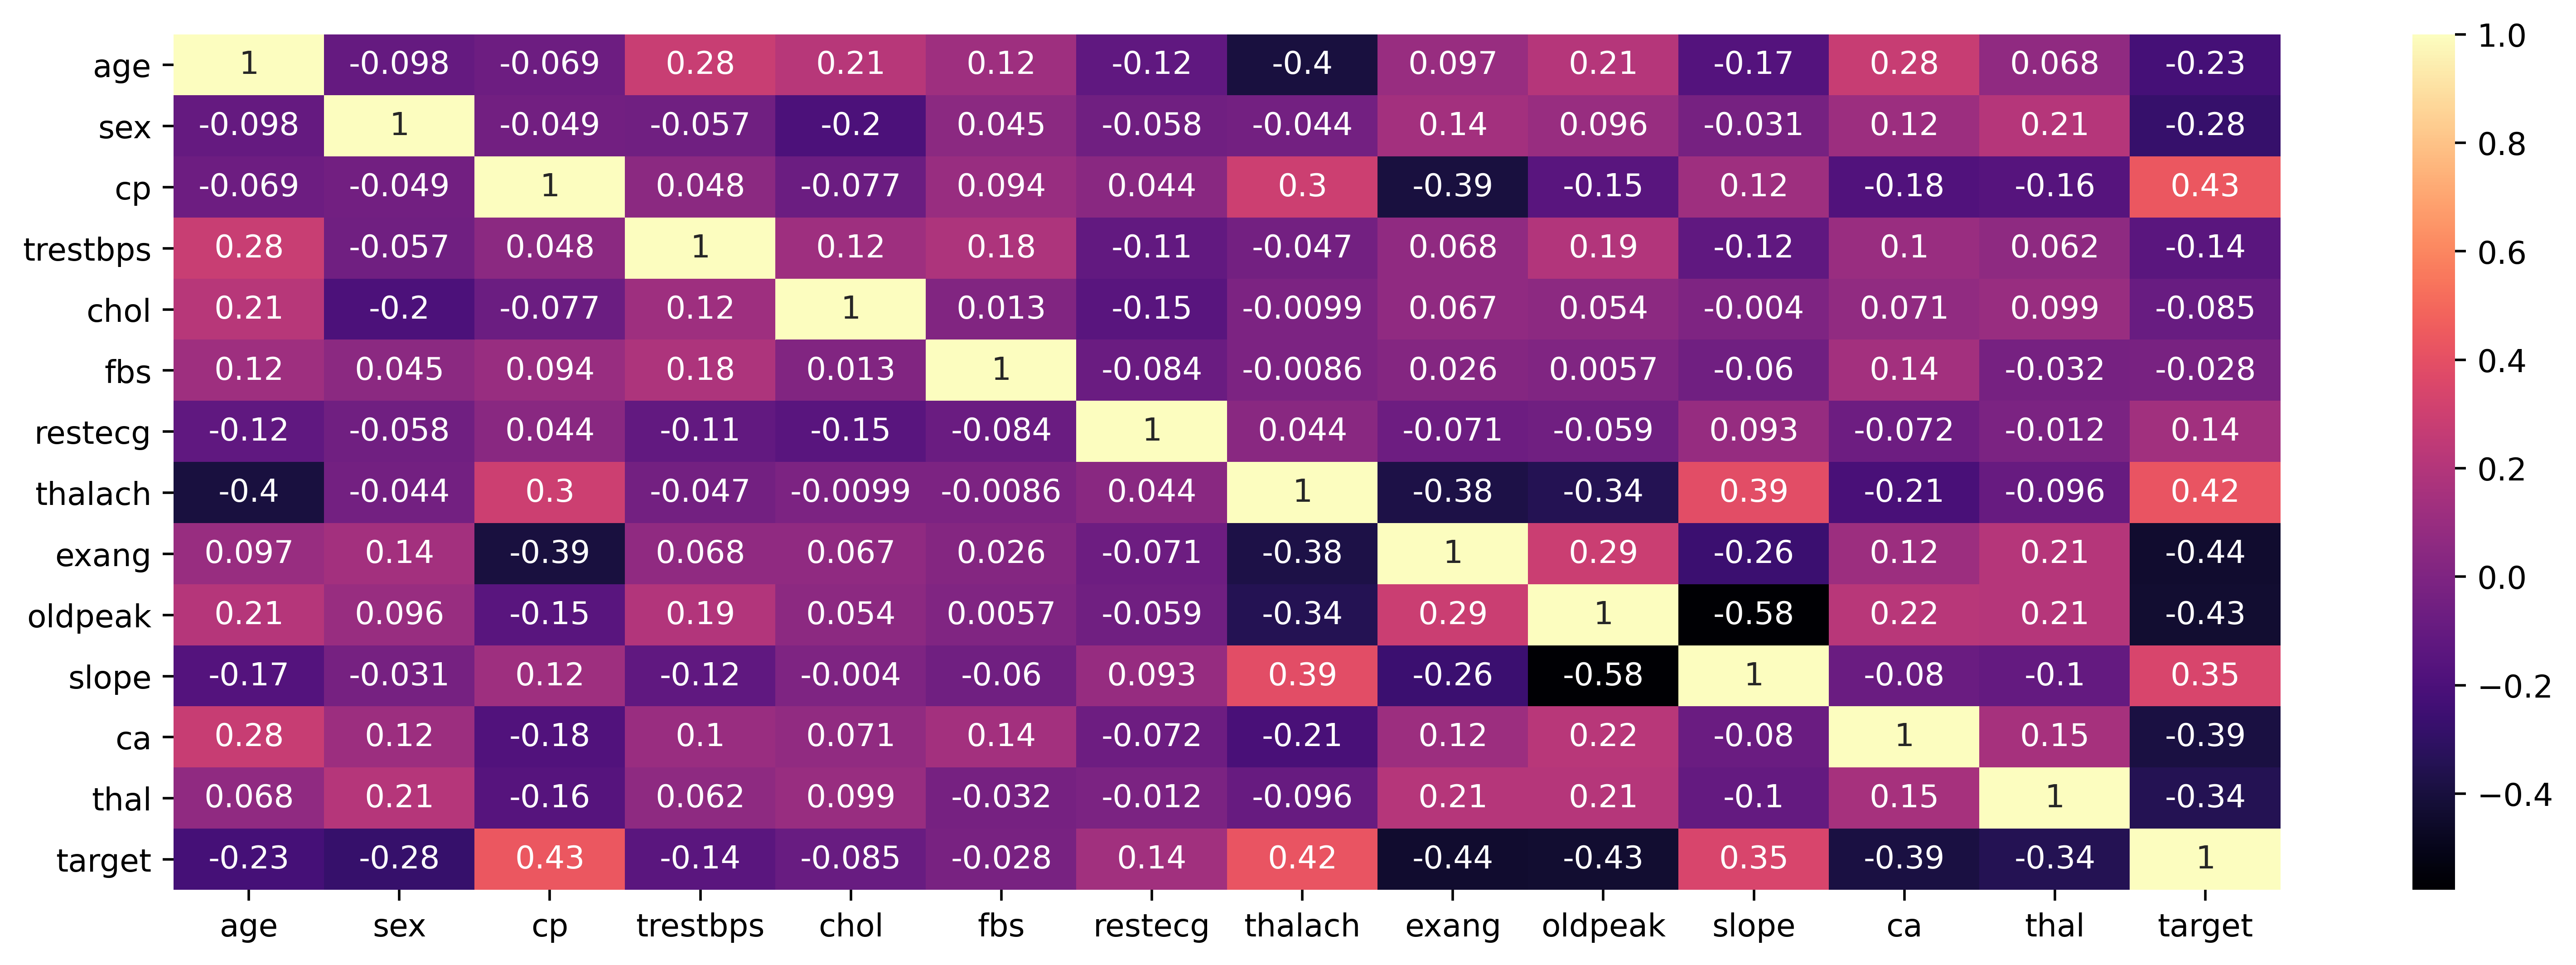

In [16]:
plt.figure(figsize=(15,5),dpi=500)
sns.heatmap(df.corr(),annot=True,cmap="magma");


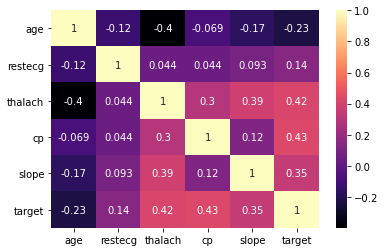

In [17]:
sns.heatmap(df_simp.corr(),annot=True,cmap="magma");

# max heart rate, chest pain type affect the target greatly

**chest pain**

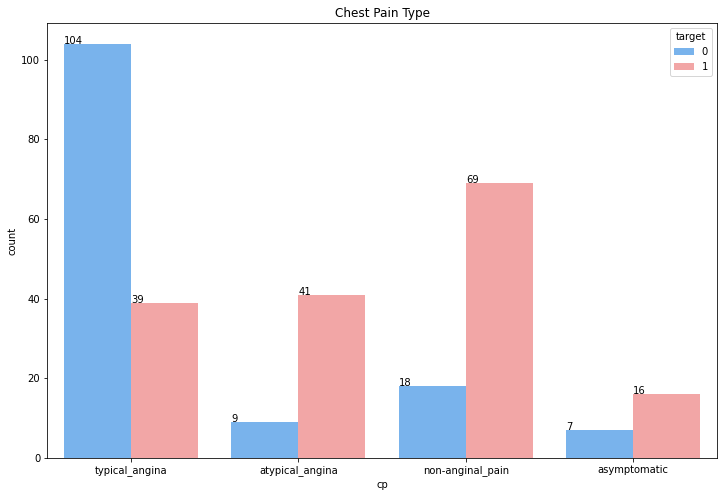

In [18]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='cp',data=df,hue='target',palette=colors);
plt.title('Chest Pain Type')
ax.set_xticklabels(['typical_angina',"atypical_angina","non-anginal_pain","asymptomatic"])

for p in ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt);

In [19]:
df1 = df.groupby('cp')['target'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

**show percentage value using catplot**

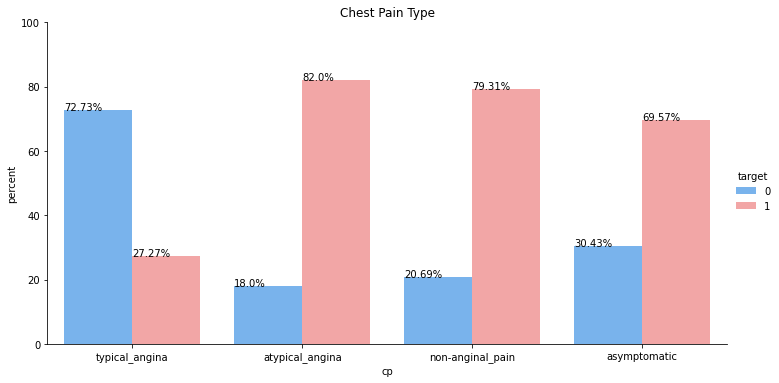

In [20]:
g = sns.catplot(x='cp',y='percent',hue='target',kind='bar',data=df1,aspect=2,palette=colors)
g.ax.set_ylim(0,100)
plt.title('Chest Pain Type')
g.ax.set_xticklabels(['typical_angina',"atypical_angina","non-anginal_pain","asymptomatic"])

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

**thalach - maximum heart rate**

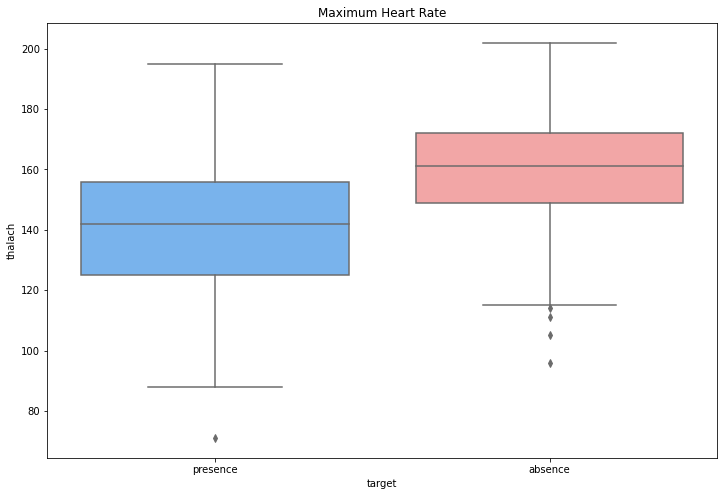

In [21]:
plt.figure(figsize=(12,8))
ax=sns.boxplot(x='target',y='thalach',data=df,palette=colors);
plt.title("Maximum Heart Rate")
ax.set_xticklabels(['presence',"absence"]);

**slope - slope of peak exercise**

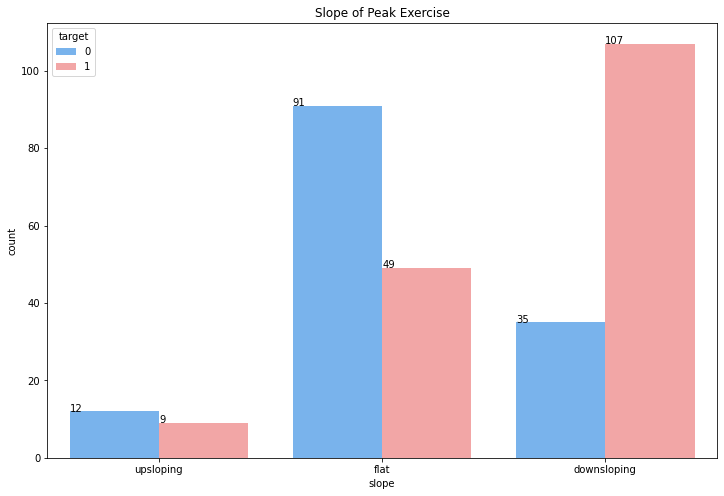

In [22]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='slope',data=df,hue='target',palette=colors);
plt.title("Slope of Peak Exercise")
ax.set_xticklabels(['upsloping','flat','downsloping'])
for p in ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt);

<Figure size 1296x648 with 0 Axes>

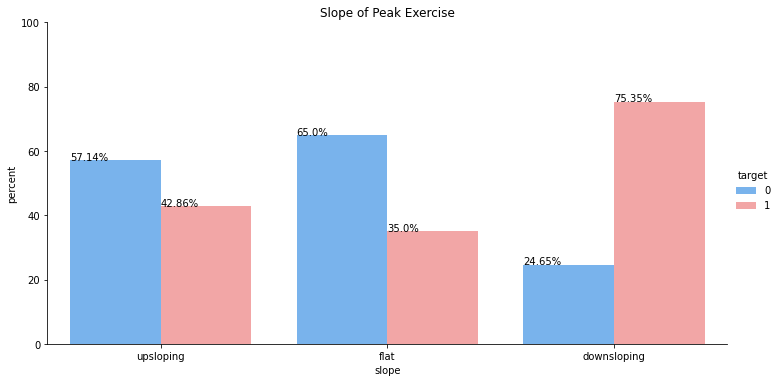

In [23]:
df1 = df.groupby('slope')['target'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()
plt.figure(figsize=(18,9))

g = sns.catplot(x='slope',y='percent',hue='target',kind='bar',data=df1,palette=colors,aspect=2)
g.ax.set_ylim(0,100)
plt.title("Slope of Peak Exercise")
g.ax.set_xticklabels(['upsloping','flat','downsloping'])

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

**restecg - resting electrocardiographic**

In [24]:
df['restecg'].unique()

array([0, 1, 2], dtype=int64)

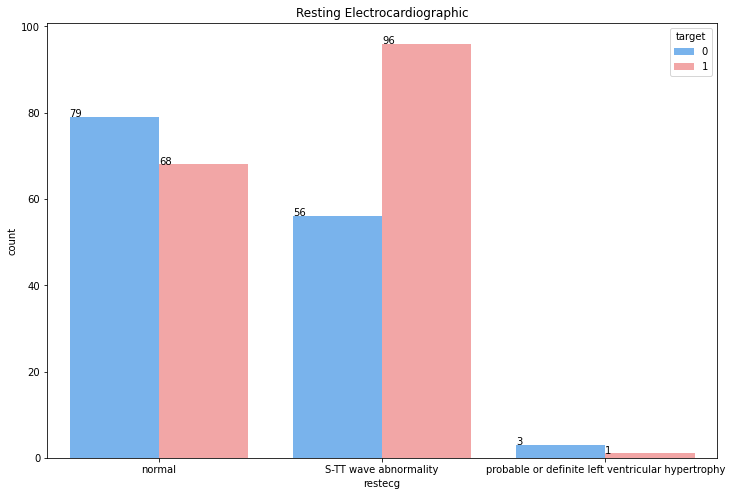

In [25]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x='restecg',data=df,hue='target',palette=colors);
plt.title("Resting Electrocardiographic")
ax.set_xticklabels(['normal','S-TT wave abnormality','probable or definite left ventricular hypertrophy'])
for p in ax.patches:
    txt = str(p.get_height().round(2)) 
    txt_x = p.get_x() 
    txt_y = p.get_height()
    ax.text(txt_x,txt_y,txt);

<Figure size 1296x648 with 0 Axes>

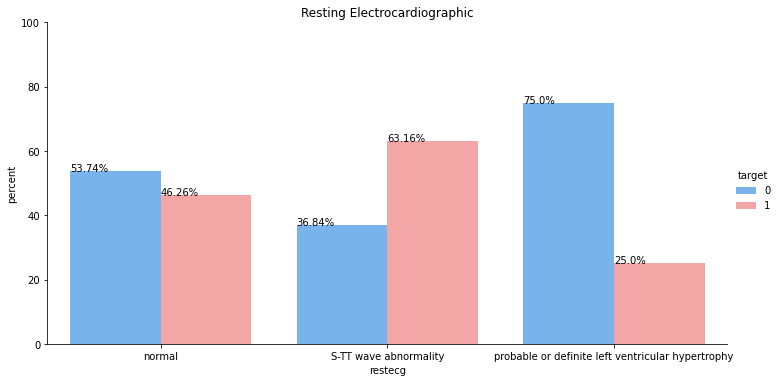

In [26]:
df1 = df.groupby('restecg')['target'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

plt.figure(figsize=(18,9))
g = sns.catplot(x='restecg',y='percent',hue='target',kind='bar',data=df1,palette=colors,aspect=2)
g.ax.set_ylim(0,100)
plt.title("Resting Electrocardiographic")
g.ax.set_xticklabels(['normal','S-TT wave abnormality','probable or definite left ventricular hypertrophy'])

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

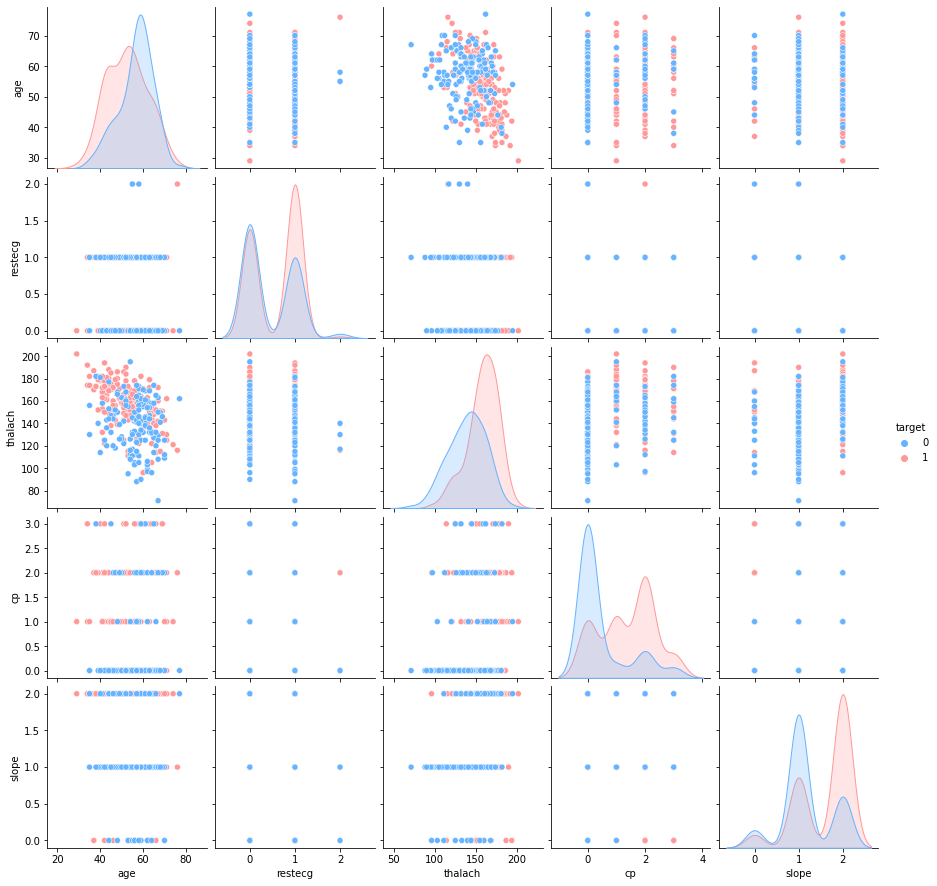

In [27]:
sns.pairplot(data=df_simp,hue='target',palette=colors);

# Data Cleaning

In [28]:
#using zscore to detect outliers
z = np.abs(stats.zscore(df))
z

array([[0.9521966 , 0.68100522, 1.97312292, ..., 0.71442887, 2.14887271,
        0.91452919],
       [1.91531289, 0.68100522, 1.00257707, ..., 0.71442887, 0.51292188,
        0.91452919],
       [1.47415758, 1.46841752, 0.03203122, ..., 0.71442887, 0.51292188,
        0.91452919],
       ...,
       [1.50364073, 0.68100522, 0.93851463, ..., 1.24459328, 1.12302895,
        1.09345881],
       [0.29046364, 0.68100522, 0.93851463, ..., 0.26508221, 1.12302895,
        1.09345881],
       [0.29046364, 1.46841752, 0.03203122, ..., 0.26508221, 0.51292188,
        1.09345881]])

In [29]:
# Create a new dataframe that contain zscore less than 3
df1 = df[(z < 3).all(axis=1)]

In [30]:
# Total number of rows and columns for the latest dataframe
df1.shape

(287, 14)

In [31]:
# Check the missing value and data types
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       287 non-null    int64  
 1   sex       287 non-null    int64  
 2   cp        287 non-null    int64  
 3   trestbps  287 non-null    int64  
 4   chol      287 non-null    int64  
 5   fbs       287 non-null    int64  
 6   restecg   287 non-null    int64  
 7   thalach   287 non-null    int64  
 8   exang     287 non-null    int64  
 9   oldpeak   287 non-null    float64
 10  slope     287 non-null    int64  
 11  ca        287 non-null    int64  
 12  thal      287 non-null    int64  
 13  target    287 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.6 KB


In [32]:
# Since 'thal' should have only 3 types of unique data
df['thal'].mode()

0    2
dtype: int64

In [33]:
# Replace value 0 to 2 or the highest total number of unique data
df1['thal'] = df1['thal'].replace([0],2)

<ipython-input-33-2348b02c1462>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['thal'] = df1['thal'].replace([0],2)


In [34]:
# Since 'ca' should have only 4 types of unique data
df['ca'].mode()

0    0
dtype: int64

In [35]:
df1['ca'] = df1['ca'].replace([4],0)

<ipython-input-35-6d09f4877ba5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ca'] = df1['ca'].replace([4],0)


# Feature Engineering

In [36]:
# Change data types of all categorical features that have data types as int to category

df1['sex']=df1['sex'].astype('category')
df1['cp']=df1['cp'].astype('category')
df1['fbs']=df1['fbs'].astype('category')
df1['restecg']=df1['restecg'].astype('category')
df1['exang']=df1['exang'].astype('category')
df1['slope']=df1['slope'].astype('category')
df1['ca']=df1['ca'].astype('category')
df1['thal']=df1['thal'].astype('category')
df1['target']=df1['target'].astype('category')

<ipython-input-36-4d5350cddb37>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['sex']=df1['sex'].astype('category')
<ipython-input-36-4d5350cddb37>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cp']=df1['cp'].astype('category')
<ipython-input-36-4d5350cddb37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [37]:
df1.dtypes

age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
target      category
dtype: object

# Machine Learning

**Logistic Regression CV**

In [38]:
X = df1.drop('target',axis=1)
y = df1['target']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegressionCV

In [40]:
model = LogisticRegressionCV()

In [41]:
model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [42]:
model.C_

array([21.5443469])

In [43]:
y_pred = model.predict(X_test)

In [44]:
model.coef_

array([[ 0.05800885, -0.84122973,  0.76194159, -0.24476117, -0.27558314,
         0.18213476,  0.1812399 ,  0.59999219, -0.49010458, -0.52145705,
         0.4437573 , -1.16399802, -0.5996616 ]])

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [46]:
y_pred = model.predict(scaled_X_test)

In [47]:
# Model Accuracy
accuracy_score(y_test,y_pred)

0.896551724137931

In [48]:
confusion_matrix(y_test,y_pred)

array([[13,  1],
       [ 2, 13]], dtype=int64)

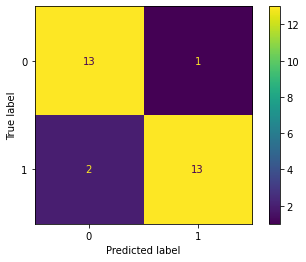

In [49]:
plot_confusion_matrix(model,scaled_X_test,y_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.87      0.90        15

    accuracy                           0.90        29
   macro avg       0.90      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



In [51]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

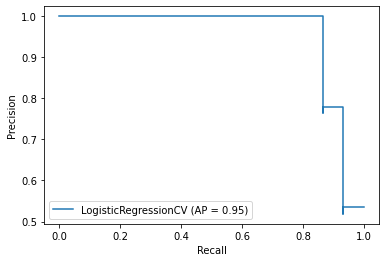

In [52]:
plot_precision_recall_curve(model,scaled_X_test,y_test)

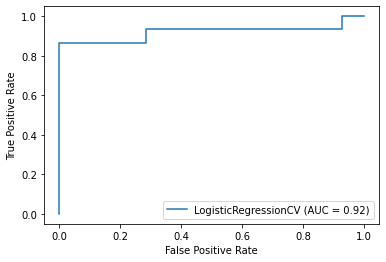

In [53]:
plot_roc_curve(model,scaled_X_test,y_test)

In [54]:
coef = model.coef_
coef

array([[ 0.05800885, -0.84122973,  0.76194159, -0.24476117, -0.27558314,
         0.18213476,  0.1812399 ,  0.59999219, -0.49010458, -0.52145705,
         0.4437573 , -1.16399802, -0.5996616 ]])

In [55]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [56]:
coef_sort={}

a=0

for i in coef[0]:
    coef_sort[X.keys()[a]]=coef[0][a]
    a=a+1

In [57]:
coef_sort

{'age': 0.058008849708884036,
 'sex': -0.8412297272658266,
 'cp': 0.761941592127451,
 'trestbps': -0.24476116724258445,
 'chol': -0.2755831370684876,
 'fbs': 0.1821347611683106,
 'restecg': 0.18123990371502374,
 'thalach': 0.5999921893459772,
 'exang': -0.4901045772960486,
 'oldpeak': -0.5214570483612362,
 'slope': 0.44375730257992557,
 'ca': -1.1639980247843822,
 'thal': -0.5996615997803391}

In [58]:
coeff = pd.DataFrame(list(coef_sort.items()),columns=['Feature','Coefficient'])
coeff = coeff.sort_values('Coefficient')

<AxesSubplot:xlabel='Feature', ylabel='Coefficient'>

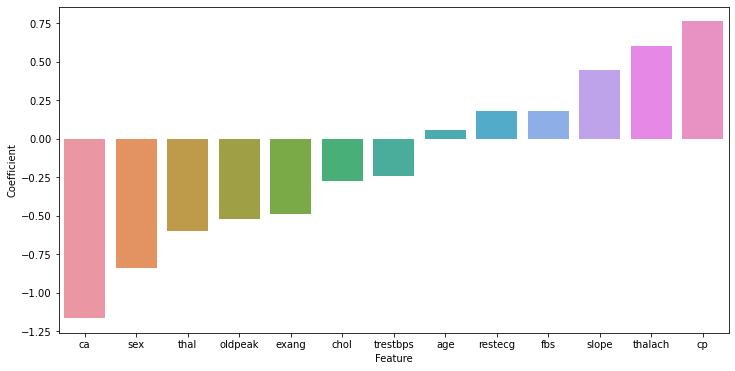

In [59]:
# Create a coefficient plot to see which features are importants
fig=plt.figure(figsize=(12,6))
sns.barplot(x='Feature',y='Coefficient',data=coeff)

# Model Deployment

In [60]:
from joblib import dump, load

In [61]:
dump(model,'target_latestmodel.h5')

['target_latestmodel.h5']

In [62]:
dump(scaler,'target_latestscaler.pkl')

['target_latestscaler.pkl']

In [63]:
target_model = load("target_latestmodel.h5") #loading the trained model

In [64]:
target_scaler = load("target_latestscaler.pkl") #loading the scaler

In [65]:
df1.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [66]:
target_example = {'age':63,
                 'sex':1,
                 'cp':3,
                 'trestbps':145,
                 'chol':233,
                 'fbs':1,
                 'restecg':0,
                 'thalach':150,
                 'exang':0,
                 'oldpeak':2.3,
                 'slope':0,
                 'ca':0,
                 'thal':1}

In [67]:
target_example.keys()

dict_keys(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'])

In [68]:
def return_prediction(model,scaler,sample_json):
    
    # For larger data features, you should probably write a for loop
    # That builds out this array for you
    
    age = sample_json['age']
    sex = sample_json['sex']
    cp = sample_json['cp']
    restbp = sample_json['trestbps']
    chol = sample_json['chol']
    fbs = sample_json['fbs']
    restecg = sample_json['restecg']
    thalach = sample_json['thalach']
    exang = sample_json['exang']
    oldpeak = sample_json['oldpeak']
    slope = sample_json['slope']
    ca = sample_json['ca']
    thal = sample_json['thal']
    
    target = [[age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal]]
    
    target = scaler.transform(target)
    
    prediction= model.predict(target)
    
    return prediction[0]

In [69]:
return_prediction(target_model,target_scaler,target_example)

1